In [20]:
#pip install beautifulsoup4
#pip install html-table-parser-python3
from bs4 import BeautifulSoup
import requests
import pandas as pd 
import numpy as np
from selenium import webdriver
from selenium.webdriver.support.ui import Select
import time
import calendar
from datetime import date
from datetime import time
from datetime import datetime
import schedule
import matplotlib.pyplot as plt

from os.path import exists

import urllib.request
 
# pretty-print python data structures
from pprint import pprint
 
from html_table_parser.parser import HTMLTableParser
#from html_table_parser import HTMLTableParser

import re

import h5py


##  To check if csv file with links already exist or create a new one

In [21]:
link1 = "https://www.x-rates.com/table/?from=EUR&amount=1"
link2 = "https://www.bankofcanada.ca/rates/exchange/daily-exchange-rates/"
link3 = "https://bankofindia.co.in/Dynamic/ForexCardRate"

links_dict = {"link1": link1, "link2": link2, "link3": link3}

def chexist(datapath):
    if exists("links.csv") is False:
        return False
    else:
        return True


if chexist("links.csv") is False:
    file = open("links.csv", "a")
    keys_list = links_dict.keys()
    for keys in keys_list:
        #print(links_dict[keys])
        file.write(f"{links_dict[keys]} \n")
    file.close()

else:
    pass
    
link_list = []
file = open("links.csv", "r")
for rows in file:
    link_list.append(rows)
file.close
    

<function TextIOWrapper.close()>

## The cell below is a function to enter scraped data into the h5 file

In [22]:
def input_data(group, df, day):  #group (first, second..), df = dataframe, day = 1,2....
    """
    function to input data into hdf file
    """
    with pd.HDFStore("data.h5", "a") as hdf:
        if day < 365:
            pass
        else:
            return
        print(f"{group}/day_{day}")
        hdf.put(f"/{group}/day_{day}", df, format = 'table', data_columns=True)

In [23]:
def url_get_contents(url):
    """
    Function to get data from websites"""
    #to make request from the website
    req = urllib.request.Request(url=url)
    f = urllib.request.urlopen(req)
    #to read contents of the website
    return f.read()

# This function is used to scrape data from the three different links in the following steps
- takes in the variable day
- iterate over the links in the list
- fetch tabular data
- identify data group
- call function to input data into h5 file

In [24]:
def scraping(day):
    for i in range(len(link_list)):

        xhtml = url_get_contents(link_list[i]).decode('utf-8')   #link_list[i]
        p = HTMLTableParser()

        # feeding the html contents to the HTMLTableParser object
        p.feed(xhtml)
        #print(p)

        table = p.tables[-1]
        df = pd.DataFrame(table)
        df.columns = df.iloc[0]   #change name of name to first row in the columns
        df = df.iloc[1:, :]  #remove first row
        df["Timestamp"] = datetime.now()  #.date()

        group_dict = {0:"first", 1:"second", 2:"third"}  #, 3:"forth"
        
        group = str(group_dict[i])
        print(group)
        print(df)
        print("I: ",i)
        #input_data(group, df, day)   #this line can be uncommented to save scraped data into h5 files

## This function is to calculate days before calling the scraping function

In [25]:
        
def loop_func():
    start_date = date(2022,8,21)
    #t = datetime.now()
    t = datetime.now().date()
    days = t - start_date
    day_str =  str(days)
    d = int(day_str.split(" ")[0])
    
    
    print(t)
    print(type(days))
    print(d)
    scraping(d)  #call scraping function daily

## In order for the scheduler to work, the while loop has to be uncommented and "loop_func()" commented

In [26]:
loop_func()

"""
 while True:
    try:
        #scheduler
        schedule.every().day.at("21:00").do(loop_func)  #scrape data everyday at 9pm
        schedule.run_pending()
    except EOFError:
        break
    except KeyboardInterrupt:
        break  """

2022-08-31
<class 'datetime.timedelta'>
10
first
0                    Euro       1.00 EUR inv. 1.00 EUR  \
1          Argentine Peso     139.724848      0.007157   
2       Australian Dollar       1.467496      0.681433   
3          Bahraini Dinar       0.378667      2.640844   
4           Botswana Pula      12.902142      0.077507   
5          Brazilian Real       5.226409      0.191336   
6         Bruneian Dollar       1.405257      0.711614   
7           Bulgarian Lev       1.955830      0.511292   
8         Canadian Dollar       1.317377      0.759084   
9            Chilean Peso     907.303102      0.001102   
10  Chinese Yuan Renminbi       6.939154      0.144110   
11         Colombian Peso    4446.127761      0.000225   
12          Croatian Kuna       7.535195      0.132711   
13           Czech Koruna      24.515593      0.040790   
14           Danish Krone       7.437448      0.134455   
15       Hong Kong Dollar       7.904917      0.126504   
16       Hungarian Fori

## Function to read data and load into dictionary with days as keys and dataframes as value pairs

In [27]:
def read_data(gr):
    
    """
    function to read data from hdf5 file"""
    with pd.HDFStore("data.h5", "r") as hdf:
        #condtion to verify input for group selection
        if gr == 1:
            group = "first"
        elif gr == 2:
            group = "second"
        elif gr == 3:
            group = "third"
        else:
            print("Invalid group")
            return
        datasets = list(hdf.items()) #get keys of group in file in form of list
        count = 0
        data_dict = {}  #initialize dictionary to store dataframes
        #for loop to iterate through datasets
        for keys in datasets:
            key = keys[0]  #get data path e.g. day_1, day_2
            subkey = key.split("/")[1]    #get current group
            data = hdf.get(f"/{key}")
            #if current group is same as selected group, load dataset
            if subkey == group:
                count += 1
                
                data_dict[count] = data
                
        return data_dict  
    

In [29]:
gro = 1
data_df = read_data(gro)  #call read data function
count = 0
for data in data_df.values():   #for loop to concatenate dataframes from specific group
    if count == 0:
        df = data
    else:
        df = pd.concat([df, data], ignore_index=True)
    count += 1
    
df

,Euro,1.00 EUR,inv. 1.00 EUR,Timestamp
0,Argentine Peso,135.866375,0.007360,2022-08-22 21:12:44.593682
1,Australian Dollar,1.445393,0.691853,2022-08-22 21:12:44.593682
2,Bahraini Dinar,0.373868,2.674739,2022-08-22 21:12:44.593682
3,Botswana Pula,12.484089,0.080102,2022-08-22 21:12:44.593682
4,Brazilian Real,5.142565,0.194455,2022-08-22 21:12:44.593682
...,...,...,...,...
472,Turkish Lira,18.225730,0.054867,2022-08-30 21:05:24.422445
473,Emirati Dirham,3.679505,0.271776,2022-08-30 21:05:24.422445
474,British Pound,0.859478,1.163498,2022-08-30 21:05:24.422445
475,US Dollar,1.001908,0.998096,2022-08-30 21:05:24.422445


## Time Series Analysis 

Date Start:  2022-08-22 21:12:44.593682
Date End:  2022-08-30 21:05:24.422445
Amount of Days:  7 days 23:52:39.828763


<AxesSubplot:title={'center':'Increase per day'}, xlabel='Timestamp'>

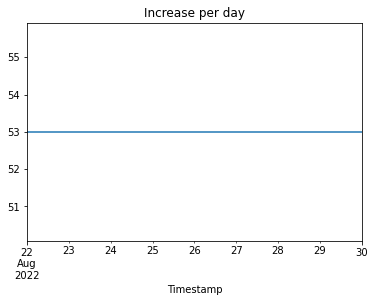

In [30]:
df = df.set_index("Timestamp")
print("Date Start: ", df.index[0])
print("Date End: ", df.index[-1])
print("Amount of Days: ", df.index[-1] - df.index[0])
increase_per_day = pd.Series(np.ones(len(df.index)), index = df.index).resample('d').sum()
increase_per_day.plot(title="Increase per day")  #
#plt.savefig("third series.png")